In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629417 entries, 0 to 1629416
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1629417 non-null  int64  
 1   kWh       1629417 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.9 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1629412    0.23
1629413    0.23
1629414    0.23
1629415    0.23
1629416    0.22
Name: kWh, Length: 1629417, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1629412    0.23
1629413    0.23
1629414    0.23
1629415    0.23
1629416    0.22
Name: kWh, Length: 1629417, dtype: float64

In [7]:
l=len(conso_data)-1
l

1629416

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629417 entries, 0 to 1629416
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1629417 non-null  int64  
 1   kWh        1629417 non-null  float64
 2   sec        1629417 non-null  float64
 3   Wh         1629417 non-null  float64
 4   cumul(ms)  1629417 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 62.2 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1629412,15601,0.23,15.601,230.754439,40261200544
1629413,15796,0.23,15.796,227.905799,40261216340
1629414,15734,0.23,15.734,228.803864,40261232074
1629415,15769,0.23,15.769,228.296024,40261247843
1629416,16292,0.22,16.292,220.967346,40261264135


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

40261264135000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 14, 25, 778810)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [18]:
conso_data['dates']

0         2023-08-21 19:14:47.712810
1         2023-08-21 19:15:09.570810
2         2023-08-21 19:15:31.571810
3         2023-08-21 19:15:53.499810
4         2023-08-21 19:16:15.390810
                     ...            
1629412   2024-11-29 18:54:26.322810
1629413   2024-11-29 18:54:42.118810
1629414   2024-11-29 18:54:57.852810
1629415   2024-11-29 18:55:13.621810
1629416   2024-11-29 18:55:29.913810
Name: dates, Length: 1629417, dtype: datetime64[ns]

## créer les dates

In [19]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:47.712810,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:15:09.570810,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:31.571810,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:53.499810,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:16:15.390810,21/08/23
...,...,...,...,...,...,...,...
1629412,15601,0.23,15.601,230.754439,40261200544,2024-11-29 18:54:26.322810,29/11/24
1629413,15796,0.23,15.796,227.905799,40261216340,2024-11-29 18:54:42.118810,29/11/24
1629414,15734,0.23,15.734,228.803864,40261232074,2024-11-29 18:54:57.852810,29/11/24
1629415,15769,0.23,15.769,228.296024,40261247843,2024-11-29 18:55:13.621810,29/11/24


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('29/11/24', 29, 11, 2024)

In [22]:
here = now.strftime('%H:%M:%S')
here

'18:56:01'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 1626118 to 1629416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3299 non-null   int64         
 1   kWh        3299 non-null   float64       
 2   sec        3299 non-null   float64       
 3   Wh         3299 non-null   float64       
 4   cumul(ms)  3299 non-null   int64         
 5   dates      3299 non-null   datetime64[ns]
 6   days       3299 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 206.2+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.817, 3.7, 4.229, 3.675, 4.189, 4.6, 3.53, 3.419, 3.513, 3.69, 3.754, 3.814, 4.249, 3.79, 3.487, 3.634, 3.321, 3.383, 4.277, 4.009, 4.043, 3.931, 3.448, 4.443, 3.756, 3.76, 4.326, 4.706, 3.82, 3.224, 3.179, 3.988, 3.683, 3.157, 3.802, 4.126, 3.768, 3.579, 4.769, 4.197, 4.538, 3.776, 3.408, 4.306, 3.879, 3.857, 3.441, 4.08, 3.657, 3.399, 4.136, 3.385, 3.883, 3.835, 3.637, 3.759, 4.247, 3.298, 3.875, 2.987, 2.055, 2.042, 2.446, 4.089, 3.719, 4.331, 3.611, 3.928, 3.742, 3.902, 4.003, 4.106, 3.656, 3.154, 3.805, 3.508, 3.626, 3.709, 3.683, 3.244, 3.86, 3.252, 3.795, 3.612, 4.078, 3.564, 3.385, 3.818, 4.065, 4.328, 4.136, 3.998, 4.235, 3.742, 3.929, 3.86, 3.915, 3.737, 4.05, 4.346, 3.885, 3.506, 3.682, 3.668, 3.347, 3.847, 4.0, 4.1, 3.477, 4.175, 3.604, 4.061, 4.546, 3.678, 3.436, 3.58, 4.152, 3.703, 4.089, 3.98, 3.746, 3.59, 5.126, 3.702, 3.766, 4.287, 4.107, 4.697, 4.407, 3.996, 3.766, 4.34, 4.706, 4.193, 4.793, 4.315, 3.731, 4.171, 3.7, 3.655, 3.531, 3.934, 3.682, 3.785, 3.58, 3.487, 3

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1629417

In [30]:
period(p=2)

2023-08-22 01:21:01.515810	2023-08-22 08:25:17.135810	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.293975
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.489116
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

3.299

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 1626118 to 1629416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3299 non-null   int64         
 1   kWh        3299 non-null   float64       
 2   sec        3299 non-null   float64       
 3   Wh         3299 non-null   float64       
 4   cumul(ms)  3299 non-null   int64         
 5   dates      3299 non-null   datetime64[ns]
 6   days       3299 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 206.2+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


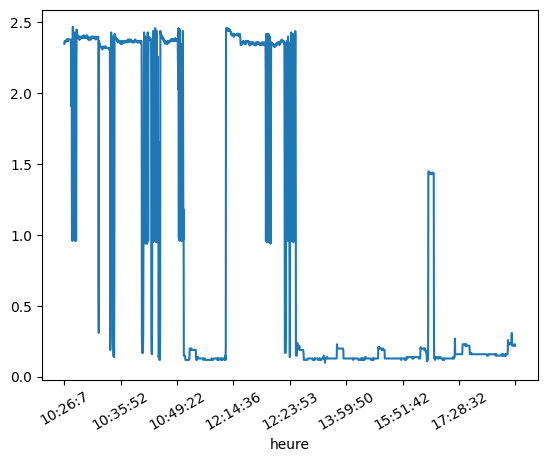

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:47.712810,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:15:09.570810,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:31.571810,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:53.499810,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:16:15.390810,21/08/23
...,...,...,...,...,...,...,...
1629412,15601,0.23,15.601,230.754439,40261200544,2024-11-29 18:54:26.322810,29/11/24
1629413,15796,0.23,15.796,227.905799,40261216340,2024-11-29 18:54:42.118810,29/11/24
1629414,15734,0.23,15.734,228.803864,40261232074,2024-11-29 18:54:57.852810,29/11/24
1629415,15769,0.23,15.769,228.296024,40261247843,2024-11-29 18:55:13.621810,29/11/24


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:5,28167,0.13,28.167,127.809138,40193139482,2024-11-29 00:00:05.260810,29/11/24
0:0:32,27369,0.13,27.369,131.535679,40193166851,2024-11-29 00:00:32.629810,29/11/24
0:0:58,25829,0.14,25.829,139.378218,40193192680,2024-11-29 00:00:58.458810,29/11/24
0:1:24,26424,0.14,26.424,136.239782,40193219104,2024-11-29 00:01:24.882810,29/11/24
0:1:51,27035,0.13,27.035,133.160718,40193246139,2024-11-29 00:01:51.917810,29/11/24
...,...,...,...,...,...,...,...
18:54:26,15601,0.23,15.601,230.754439,40261200544,2024-11-29 18:54:26.322810,29/11/24
18:54:42,15796,0.23,15.796,227.905799,40261216340,2024-11-29 18:54:42.118810,29/11/24
18:54:57,15734,0.23,15.734,228.803864,40261232074,2024-11-29 18:54:57.852810,29/11/24


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.568
Min : 18/11/24 3.156


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1626118,28167,0.13,28.167,127.809138,40193139482,2024-11-29 00:00:05.260810,29/11/24,0:0:5
1626119,27369,0.13,27.369,131.535679,40193166851,2024-11-29 00:00:32.629810,29/11/24,0:0:32
1626120,25829,0.14,25.829,139.378218,40193192680,2024-11-29 00:00:58.458810,29/11/24,0:0:58
1626121,26424,0.14,26.424,136.239782,40193219104,2024-11-29 00:01:24.882810,29/11/24,0:1:24
1626122,27035,0.13,27.035,133.160718,40193246139,2024-11-29 00:01:51.917810,29/11/24,0:1:51
...,...,...,...,...,...,...,...,...
1629412,15601,0.23,15.601,230.754439,40261200544,2024-11-29 18:54:26.322810,29/11/24,18:54:26
1629413,15796,0.23,15.796,227.905799,40261216340,2024-11-29 18:54:42.118810,29/11/24,18:54:42
1629414,15734,0.23,15.734,228.803864,40261232074,2024-11-29 18:54:57.852810,29/11/24,18:54:57
1629415,15769,0.23,15.769,228.296024,40261247843,2024-11-29 18:55:13.621810,29/11/24,18:55:13


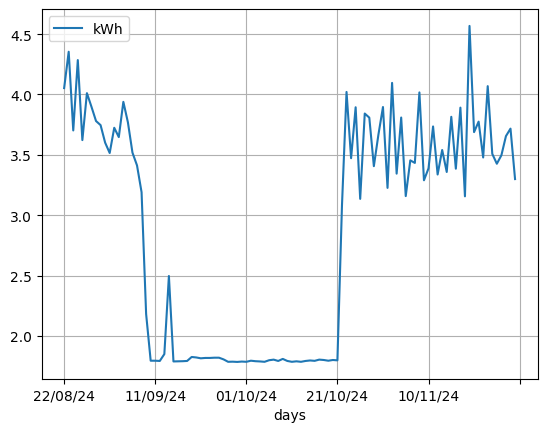

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-29 00:00:05.260810	2024-11-29 08:57:07.432810	8h 57m 2s 	1000
2024-11-29 08:57:07.432810	2024-11-29 12:06:34.317810	3h 9m 26s 	2000
2024-11-29 12:06:34.317810	2024-11-29 17:07:28.942810	5h 0m 54s 	3000
2024-11-29 17:07:28.942810	2024-11-29 18:55:29.913810	1h 48m 0s 	299
<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 1626118 to 1629416
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3299 non-null   int64         
 1   kWh        3299 non-null   float64       
 2   sec        3299 non-null   float64       
 3   Wh         3299 non-null   float64       
 4   cumul(ms)  3299 non-null   int64         
 5   dates      3299 non-null   datetime64[ns]
 6   days       3299 non-null   object        
 7   heure      3299 non-null   object        
 8   hours      3299 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 257.7+ KB


('29/11/24', <Axes: xlabel='hours'>)

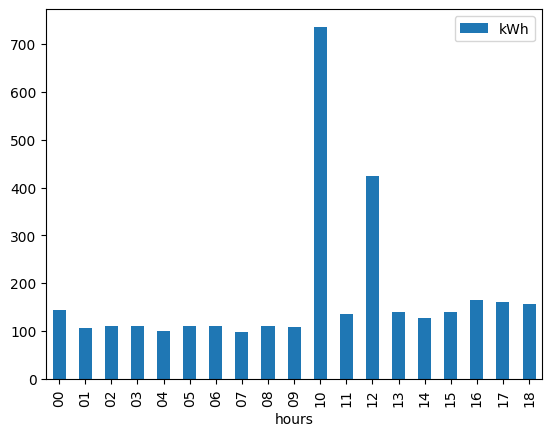

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.817
22/08/23,3.700
23/08/23,4.229
24/08/23,3.675
25/08/23,4.189
...,...
25/11/24,3.426
26/11/24,3.496
27/11/24,3.655


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


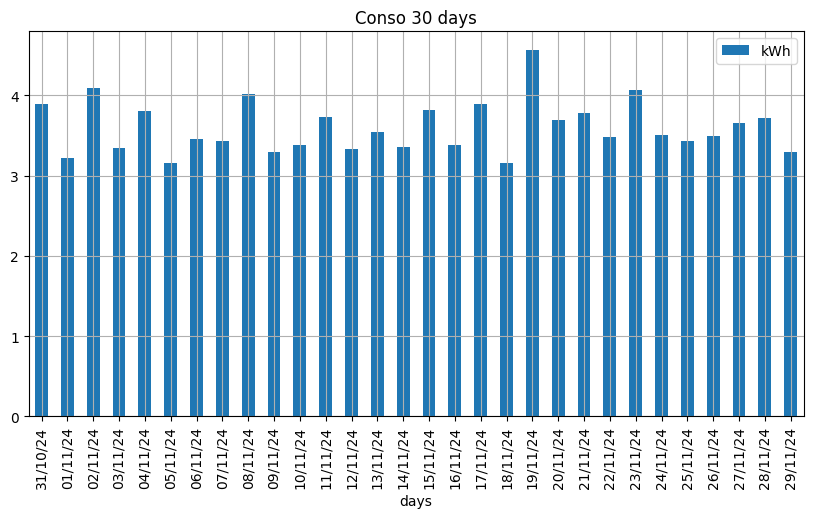

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


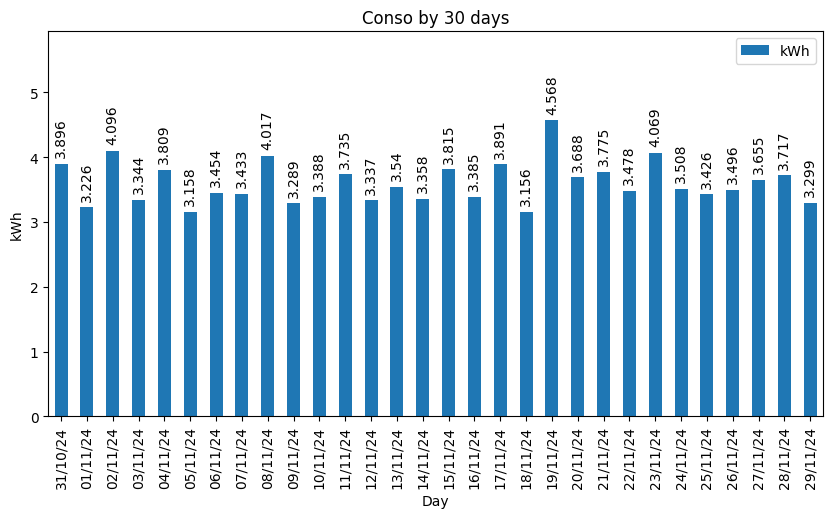

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
31/10/24    3.896
01/11/24    3.226
02/11/24    4.096
03/11/24    3.344
04/11/24    3.809
05/11/24    3.158
06/11/24    3.454
07/11/24    3.433
08/11/24    4.017
09/11/24    3.289
10/11/24    3.388
11/11/24    3.735
12/11/24    3.337
13/11/24    3.540
14/11/24    3.358
15/11/24    3.815
16/11/24    3.385
17/11/24    3.891
18/11/24    3.156
19/11/24    4.568
20/11/24    3.688
21/11/24    3.775
22/11/24    3.478
23/11/24    4.069
24/11/24    3.508
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    3.299
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24',
       '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24',
       '12/11/24', '13/11/24', '14/11/24', '15/11/24', '16/11/24', '17/11/24',
       '18/11/24', '19/11/24', '20/11/24', '21/11/24', '22/11/24', '23/11/24',
       '24/11/24', '25/11/24', '26/11/24', '27/11/24', '28/11/24', '29/11/24'],
      dtype='object', name='days')

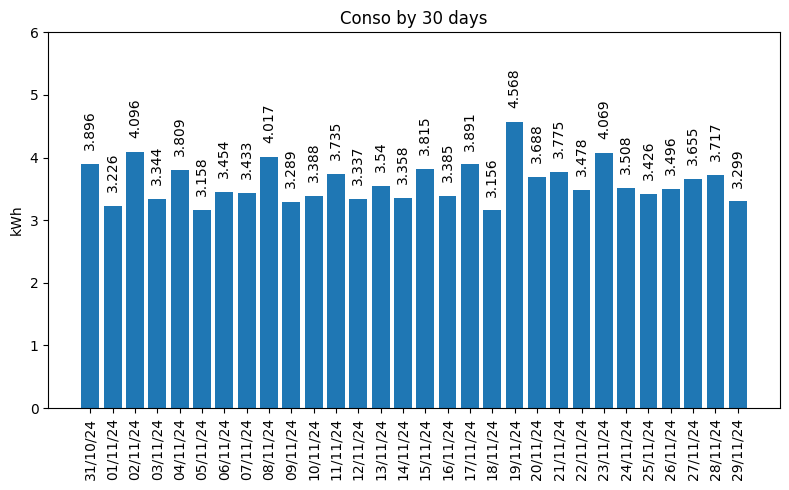

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

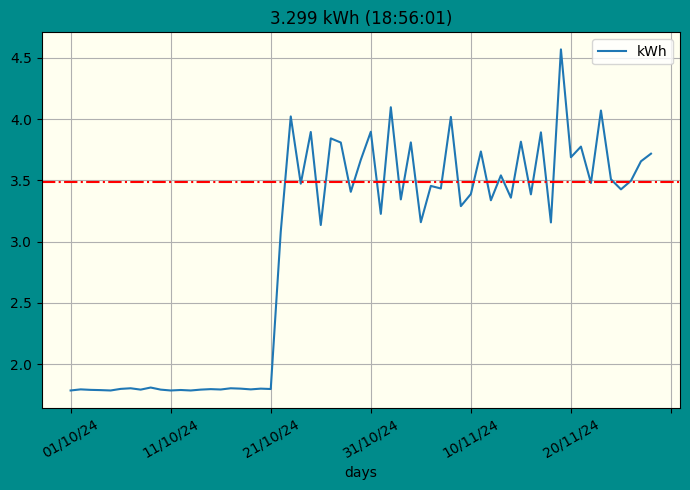

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

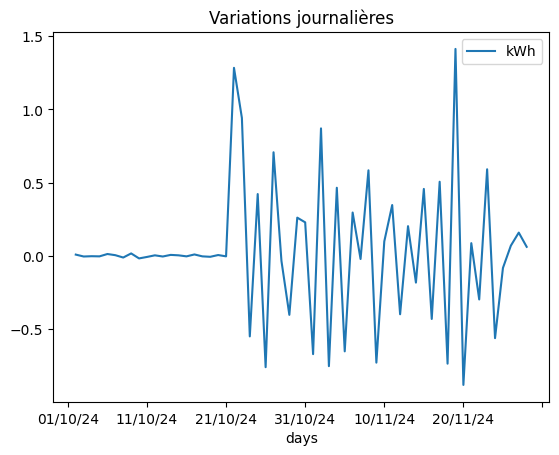

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:47.712810,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:15:09.570810,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:31.571810,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:53.499810,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:16:15.390810,21/08/23,19
...,...,...,...,...,...,...,...,...
1629412,15601,0.23,15.601,230.754439,40261200544,2024-11-29 18:54:26.322810,29/11/24,18
1629413,15796,0.23,15.796,227.905799,40261216340,2024-11-29 18:54:42.118810,29/11/24,18
1629414,15734,0.23,15.734,228.803864,40261232074,2024-11-29 18:54:57.852810,29/11/24,18
1629415,15769,0.23,15.769,228.296024,40261247843,2024-11-29 18:55:13.621810,29/11/24,18


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,817
22/08/23,3700
23/08/23,4229
24/08/23,3675
25/08/23,4189
...,...
25/11/24,3426
26/11/24,3496
27/11/24,3655


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:47.712810,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:15:09.570810,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:15:31.571810,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:53.499810,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:16:15.390810,21/08/23,19
...,...,...,...,...,...,...,...,...
1629412,15601,0.23,15.601,230.754439,40261200544,2024-11-29 18:54:26.322810,29/11/24,18
1629413,15796,0.23,15.796,227.905799,40261216340,2024-11-29 18:54:42.118810,29/11/24,18
1629414,15734,0.23,15.734,228.803864,40261232074,2024-11-29 18:54:57.852810,29/11/24,18
1629415,15769,0.23,15.769,228.296024,40261247843,2024-11-29 18:55:13.621810,29/11/24,18


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
29/11/24 18    1629412  29/11/24    18  0.23
               1629413  29/11/24    18  0.23
               1629414  29/11/24    18  0.23
               1629415  29/11/24    18  0.23
               1629416  29/11/24    18  0.22

[1629417 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,817,817
22/08/23,3700,3700
23/08/23,4229,4229
24/08/23,3675,3675
25/08/23,4189,4189
...,...,...
25/11/24,3426,3426
26/11/24,3496,3496
27/11/24,3655,3655


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        817
22/08/23       4517
23/08/23       8746
24/08/23      12421
25/08/23      16610
             ...   
25/11/24    1615250
26/11/24    1618746
27/11/24    1622401
28/11/24    1626118
29/11/24    1629417
Name: kWh, Length: 467, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     139
         20     287
         21     131
         22     130
         23     130
...             ...
29/11/24 14     128
         15     139
         16     166
         17     160
         18     156

[11184 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           139
          20           426
          21           557
          22           687
          23           817
                    ...   
29/11/24  14       1628796
          15       1628935
          16       1629101
          17       1629261
          18       1629417
Name: kWh, Length: 11184, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     139     139    NaN
         20     287     426  148.0
         21     131     557 -156.0
         22     130     687   -1.0
         23     130     817    0.0
...             ...     ...    ...
29/11/24 14     128    2678  -12.0
         15     139    2817   11.0
         16     166    2983   27.0
         17     160    3143   -6.0
         18     156    3299   -4.0

[11184 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('29/11/24',
        kWh  cumsum   diff
 hours                    
 00     145     145    NaN
 01     107     252  -38.0
 02     110     362    3.0
 03     111     473    1.0
 04     101     574  -10.0
 05     111     685   10.0
 06     110     795   -1.0
 07      99     894  -11.0
 08     110    1004   11.0
 09     109    1113   -1.0
 10     736    1849  627.0
 11     136    1985 -600.0
 12     425    2410  289.0
 13     140    2550 -285.0
 14     128    2678  -12.0
 15     139    2817   11.0
 16     166    2983   27.0
 17     160    3143   -6.0
 18     156    3299   -4.0)

Text(0.5, 1.0, 'Cumul journalier')

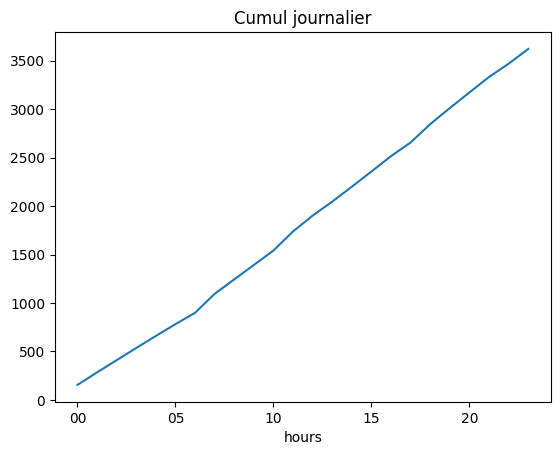

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

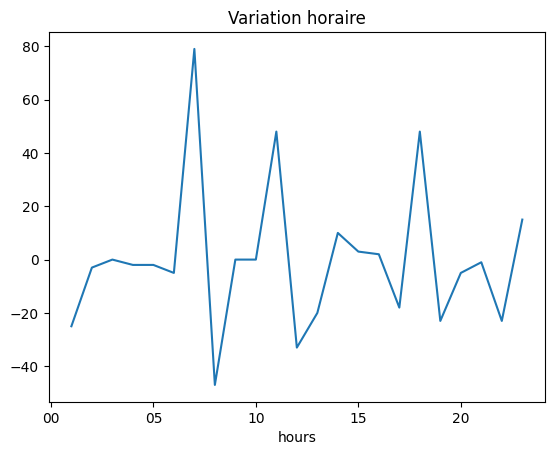

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

467

In [71]:
df_grp.tail(n)['kWh'].describe()


count    467.000000
mean       3.489116
std        0.698805
min        0.817000
25%        3.345500
50%        3.621000
75%        3.872000
max        5.126000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '467 days')

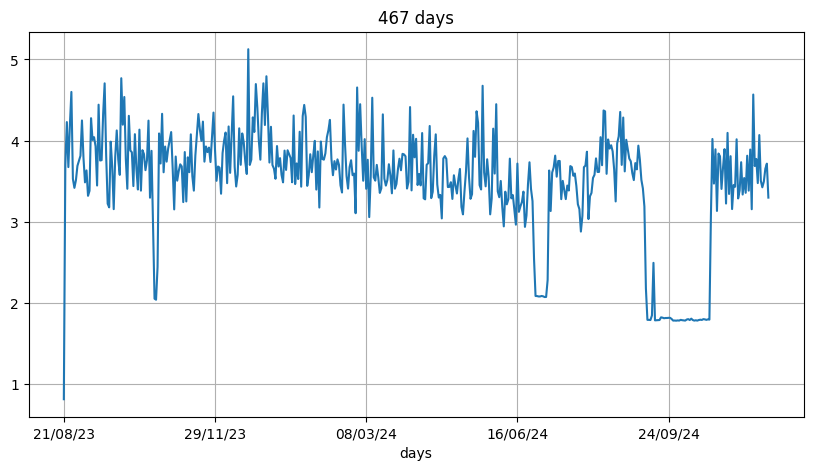

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

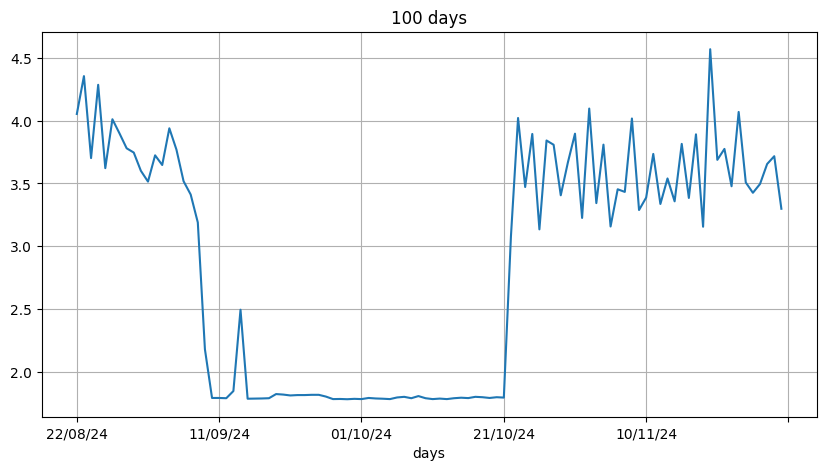

In [74]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.817
22/08/23    3.700
23/08/23    4.229
24/08/23    3.675
25/08/23    4.189
            ...  
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    3.299
Name: kWh, Length: 467, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,467.000000
mean,3.489116
std,0.698805
min,0.817000
25%,3.345500
50%,3.621000
75%,3.872000
max,5.126000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

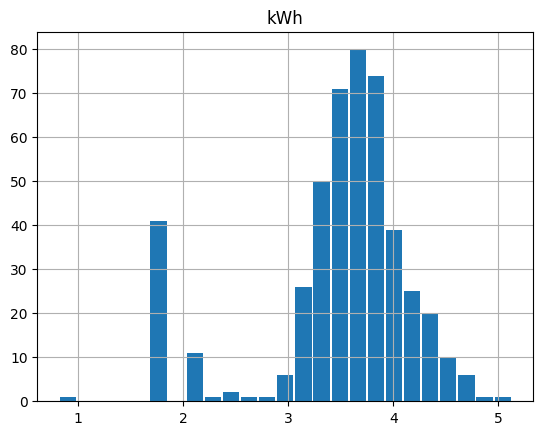

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
22/08/24    4.053
23/08/24    4.354
24/08/24    3.702
25/08/24    4.285
26/08/24    3.622
            ...  
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    3.299
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [79]:
day

'29/11/24'

In [80]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,145,145,NaN
01,107,252,-38.0
02,110,362,3.0
03,111,473,1.0
04,101,574,-10.0
05,111,685,10.0
06,110,795,-1.0
07,99,894,-11.0
08,110,1004,11.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


19

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 20)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 00 to 18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     19 non-null     int64  
 1   cumsum  19 non-null     int64  
 2   diff    18 non-null     float64
 3   days    19 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 760.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
Name: days, dtype: float64

In [89]:
day

'29/11/24'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,145,145,NaN,1.0
01,107,252,-38.0,2.0
02,110,362,3.0,3.0
03,111,473,1.0,4.0
04,101,574,-10.0,5.0
05,111,685,10.0,6.0
06,110,795,-1.0,7.0
07,99,894,-11.0,8.0
08,110,1004,11.0,9.0


Text(0.5, 1.0, '29/11/24')

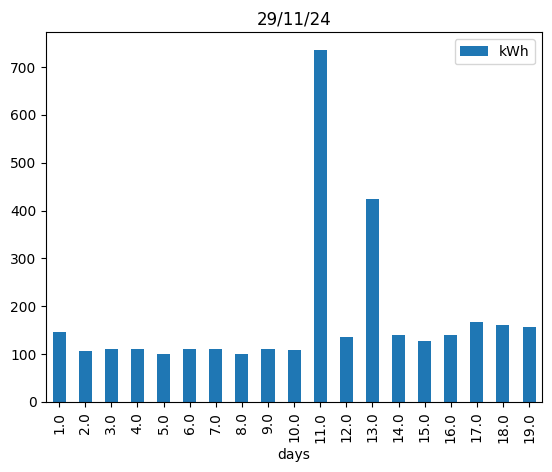

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18'],
      dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,145
01,107
02,110
03,111
04,101
05,111
06,110
07,99
08,110


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    153
02    169
03    160
04    152
05    141
06    115
07    131
08    130
09    115
10    130
11    114
12    132
13    205
14    139
15    157
16    986
17    210
18    280
19    301
20    313
21    323
22    215
23    189
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

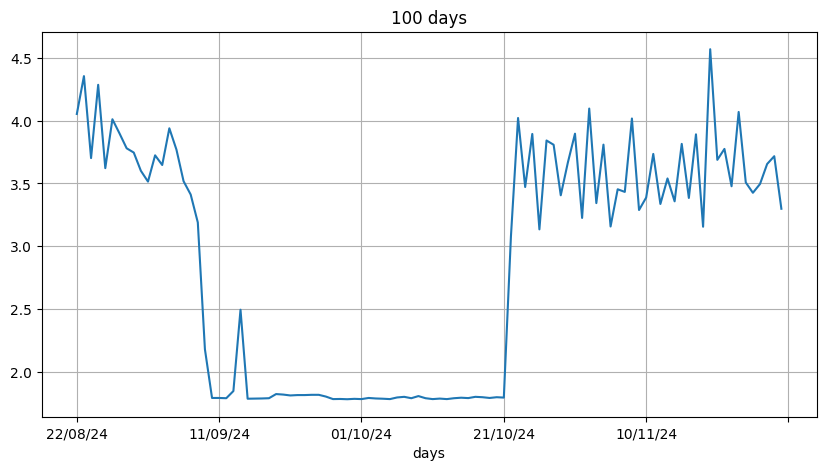

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [97]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

80.27606272697449


# Today

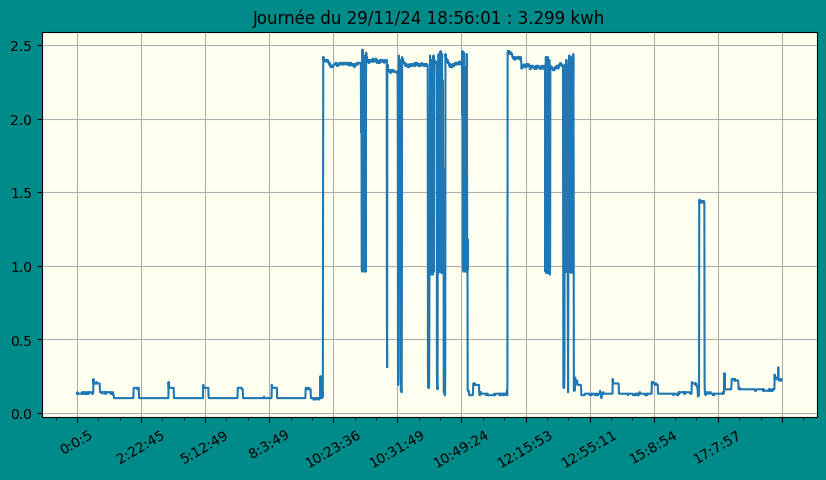

In [98]:
show(today,bgcolor='ivory')

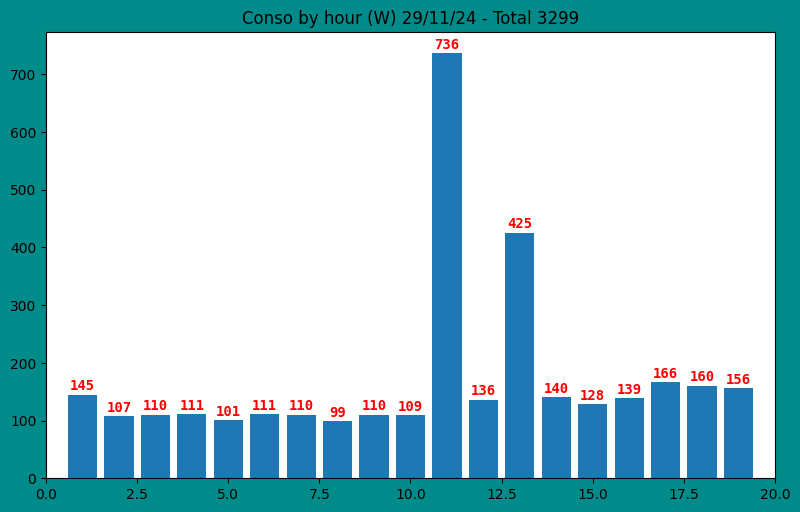

In [99]:
conso_by_hour(today)

In [100]:
day = '21/11/24'

('21/11/24', None)

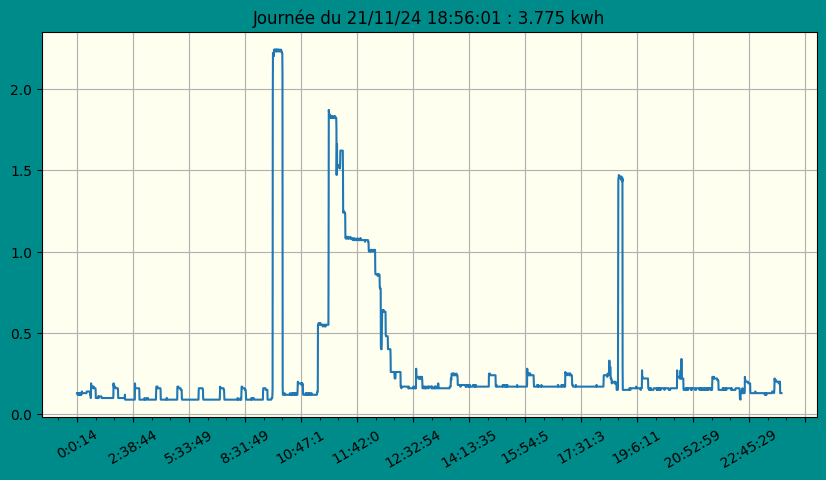

In [101]:
day, show(day,bgcolor='ivory')

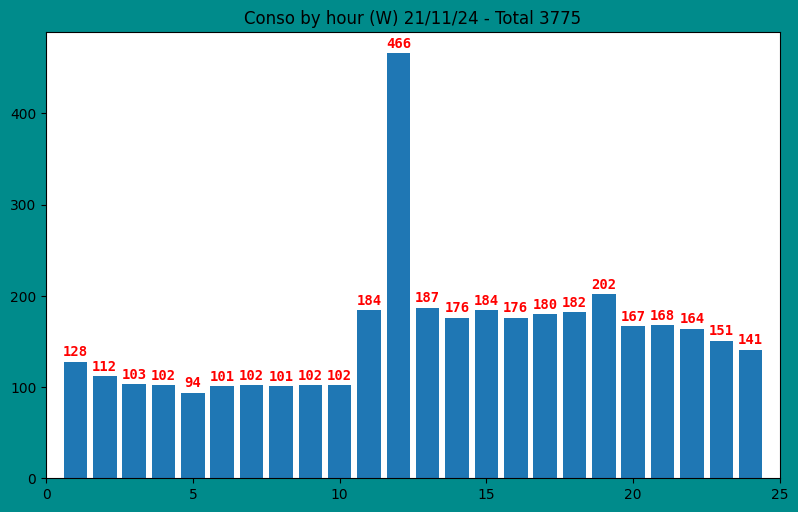

In [102]:
conso_by_hour(day)

('21/12/23', None)

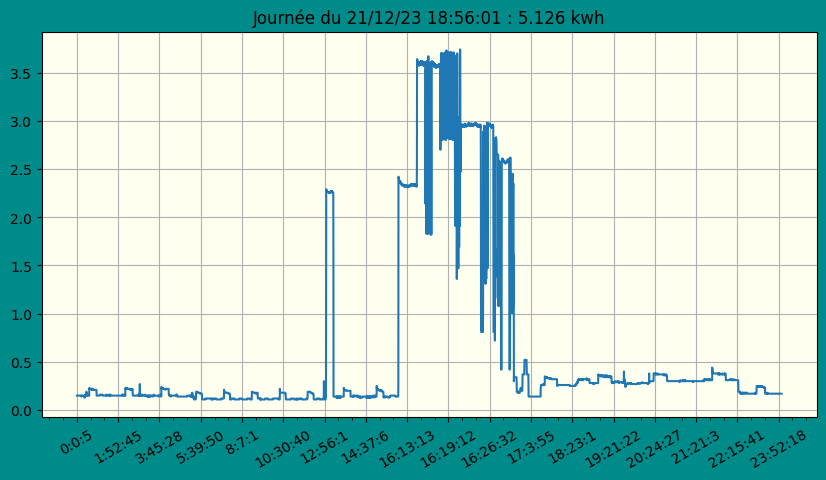

In [103]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

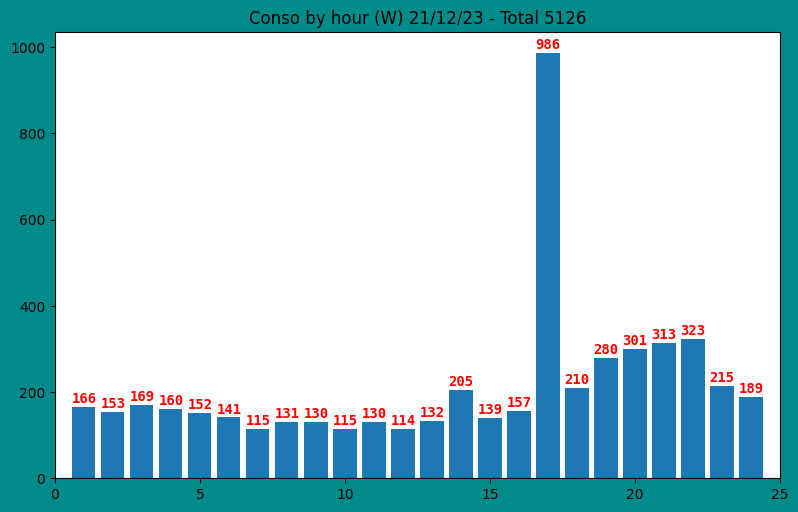

In [104]:
conso_by_hour(day)

In [105]:
sum(data)

5126

In [106]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,145,145,NaN,1.0
01,107,252,-38.0,2.0
02,110,362,3.0,3.0
03,111,473,1.0,4.0
04,101,574,-10.0,5.0
05,111,685,10.0,6.0
06,110,795,-1.0,7.0
07,99,894,-11.0,8.0
08,110,1004,11.0,9.0


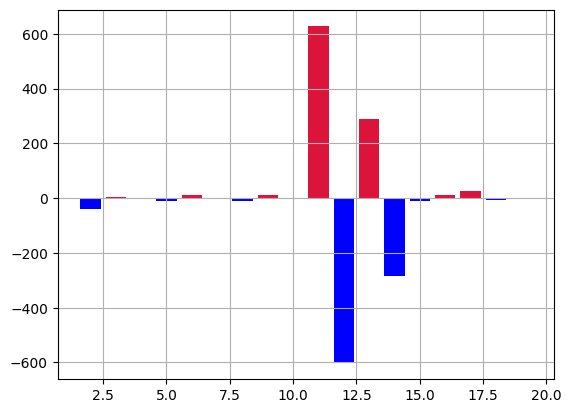

In [107]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [108]:
data

hours
00    166
01    153
02    169
03    160
04    152
05    141
06    115
07    131
08    130
09    115
10    130
11    114
12    132
13    205
14    139
15    157
16    986
17    210
18    280
19    301
20    313
21    323
22    215
23    189
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

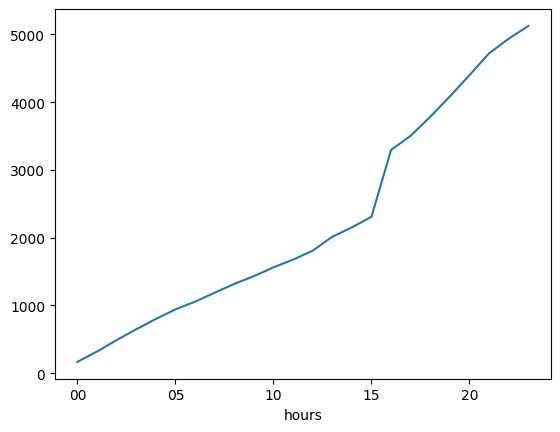

In [109]:
data.cumsum().plot()


<Axes: xlabel='hours'>

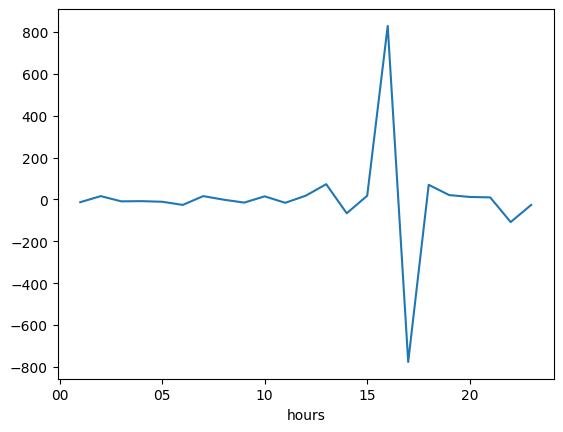

In [110]:
# evolution par heure
data.diff().plot()

In [111]:
data.diff().describe()

count     23.000000
mean       1.000000
std      244.947304
min     -776.000000
25%      -15.500000
50%       -1.000000
75%       17.000000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

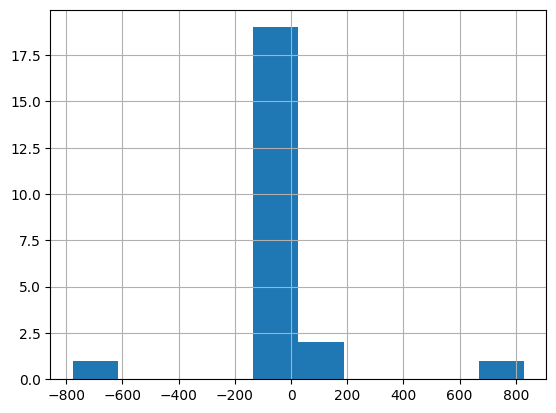

In [112]:
data.diff().hist()

# Test sauvegarde

In [113]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [114]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [115]:
#conso_byhour(day)

In [116]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


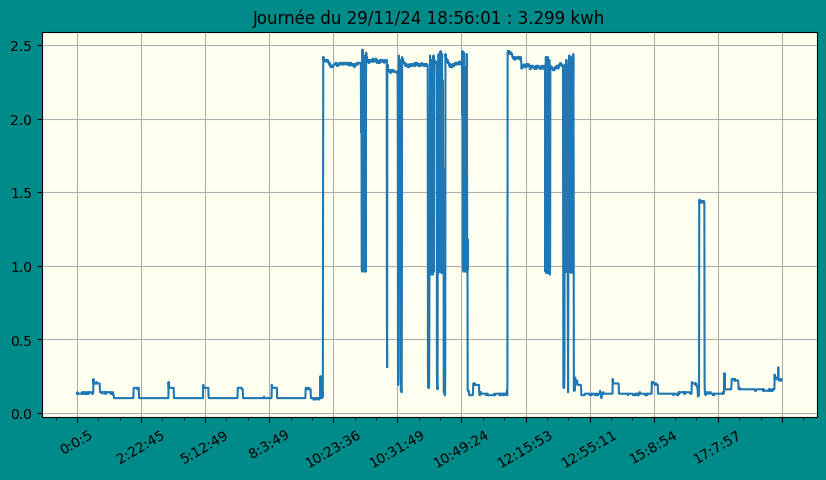

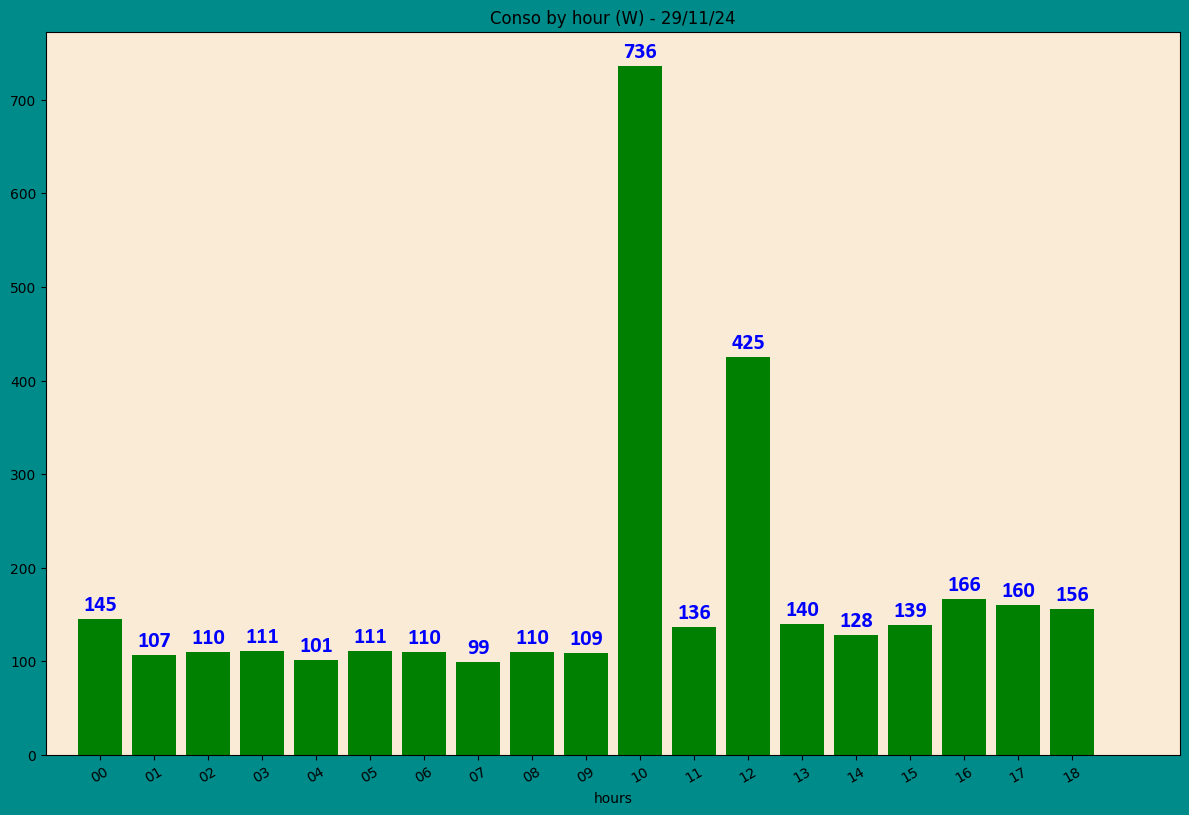

In [117]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [118]:
month.describe()


count    30.000000
mean      3.612467
std       0.318564
min       3.156000
25%       3.385750
50%       3.524000
75%       3.800500
max       4.568000
Name: kWh, dtype: float64

<Axes: >

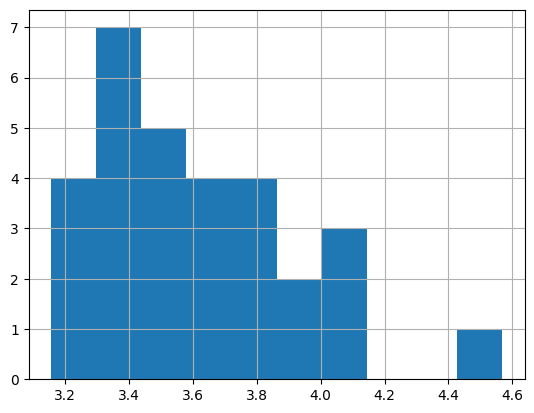

In [119]:
month.hist()

<Axes: xlabel='days'>

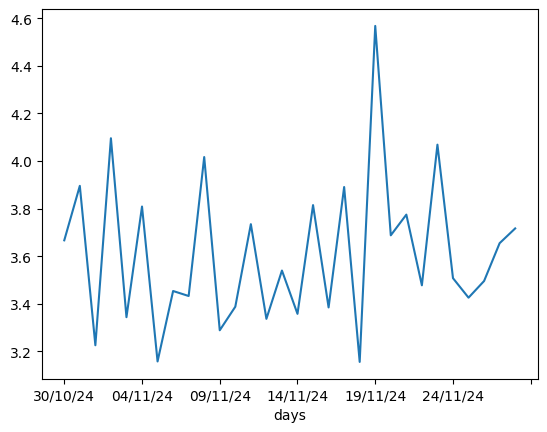

In [120]:
month.plot()

In [121]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [122]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

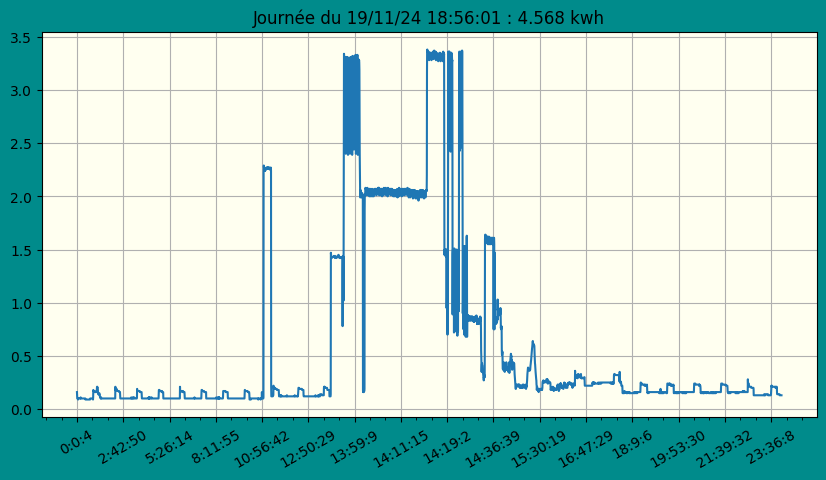

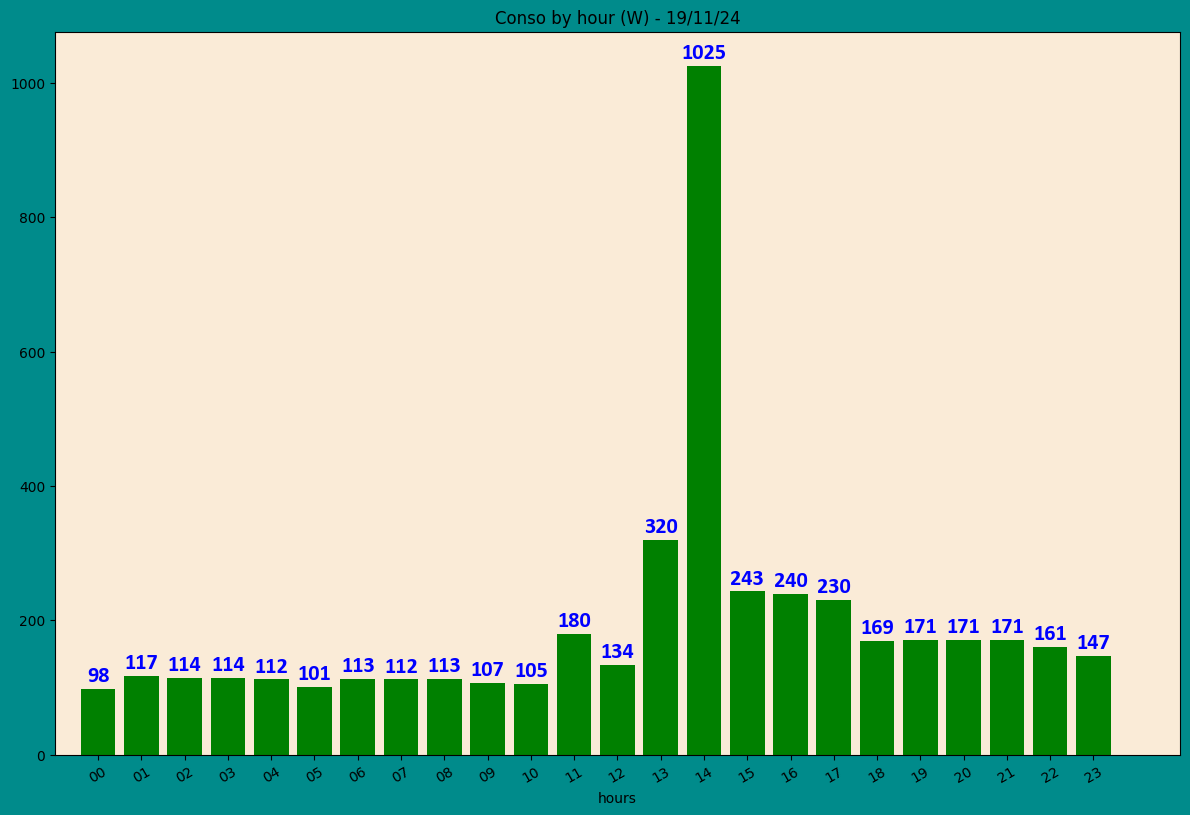

In [123]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [124]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     139     139    NaN   NaN
         20     287     426  148.0   NaN
         21     131     557 -156.0   NaN
         22     130     687   -1.0   NaN
         23     130     817    0.0   NaN
...             ...     ...    ...   ...
29/11/24 14     128    2678  -12.0  15.0
         15     139    2817   11.0  16.0
         16     166    2983   27.0  17.0
         17     160    3143   -6.0  18.0
         18     156    3299   -4.0  19.0

[11184 rows x 4 columns]

In [125]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,98,98,NaN,NaN
01,117,215,19.0,NaN
02,114,329,-3.0,NaN
03,114,443,0.0,NaN
04,112,555,-2.0,NaN
05,101,656,-11.0,NaN
06,113,769,12.0,NaN
07,112,881,-1.0,NaN
08,113,994,1.0,NaN


In [126]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

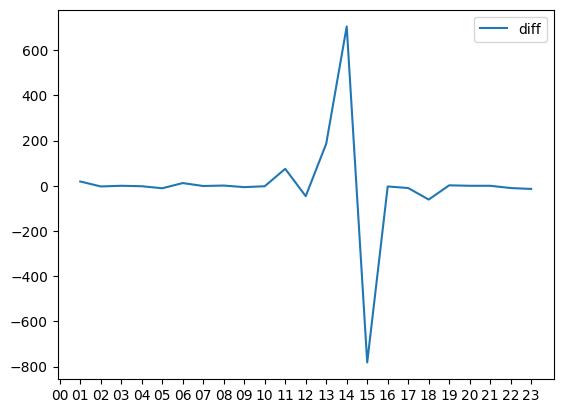

In [127]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

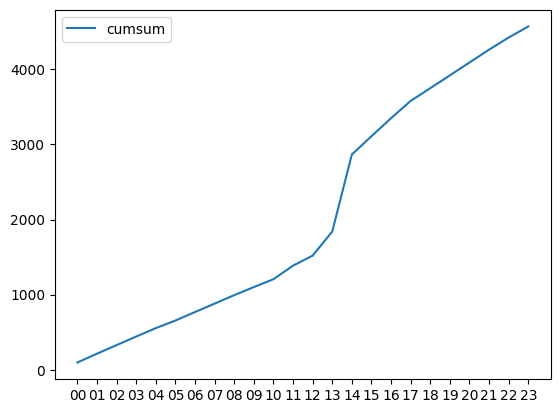

In [128]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [129]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB